In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('/content/iris.data',header=None)
train=data.sample(frac=0.8,random_state=200)
test=data.drop(train.index).sample(frac=1.0)

In [9]:
x_train = train.loc[:,:3]
y_train = train.loc[:,4]

In [11]:
modelo = Pipeline([
                   ('scale',MinMaxScaler()),
                   ('modelo',LogisticRegression())
])

In [13]:
modelo.fit(x_train,y_train)
modelo.score(x_train,y_train)

0.9583333333333334

In [16]:
x_test = test.loc[:,:3]
y_test = test.loc[:,4]
y_pred = modelo.predict(x_test)
modelo.score(x_test,y_test)


0.8

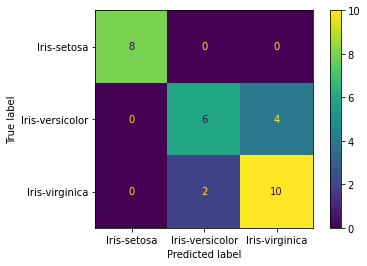

In [18]:
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_).plot()

In [20]:
from joblib import dump
dump(modelo,'modelo.joblib')

['modelo.joblib']